# Classification hierarchy with a minimum set of neurons

In [1]:
from keras import models
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

generator = check_random_state(42)
np.random.seed(42)

Using TensorFlow backend.


In [2]:
# define a few functions
def make_two_3d_circles(n_samples=10, r_out=1, r_in=0.7, noise=0.05):
    
    fig = plt.figure(figsize=(20,10))
    ax  = fig.add_subplot(111, projection='3d')

    # Make data
    u_out = np.random.uniform(0, 2 * np.pi, n_samples) 
    v_out = np.random.uniform(0, 2 * np.pi, n_samples)
    u_in  = np.random.uniform(0, 2 * np.pi, n_samples) 
    v_in  = np.random.uniform(0, 2 * np.pi, n_samples)
    
    x_out = r_out * np.outer(np.cos(u_out), np.sin(v_out)) + generator.normal(scale=noise, size=(n_samples,n_samples))
    y_out = r_out * np.outer(np.sin(u_out), np.sin(v_out)) + generator.normal(scale=noise, size=(n_samples,n_samples))
    z_out = r_out * np.outer(np.ones(np.size(u_out)), np.cos(v_out)) + generator.normal(scale=noise, size=(n_samples,n_samples))
    x_in  = r_in  * np.outer(np.cos(u_in), np.sin(v_in)) + generator.normal(scale=noise, size=(n_samples,n_samples))
    y_in  = r_in  * np.outer(np.sin(u_in), np.sin(v_in)) + generator.normal(scale=noise, size=(n_samples,n_samples))
    z_in  = r_in  * np.outer(np.ones(np.size(u_in)), np.cos(v_in)) + generator.normal(scale=noise, size=(n_samples,n_samples))

    # Plot the surface
    ax.scatter(x_in,  y_in,  z_in,  alpha=0.4 , color='b', s=200)
    ax.scatter(x_out, y_out, z_out, alpha=0.4 , color='r' , s=200)

    for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(20)
    for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(20)
    for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(20)
   
    plt.show()
    
    X = np.vstack((np.append(x_out, x_in),
                   np.append(y_out, y_in),
                   np.append(z_out, z_in))).T
    y = np.hstack([np.zeros(int(len(X)/2), dtype=np.intp),
                   np.ones (int(len(X)/2), dtype=np.intp)])
    return(X,y)

def plot_data_2d(X, y, title_str):
    
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    plt.figure(figsize=(20,10))
    plt.scatter(X[y==0,0], X[y==0,1],c='r', s=200, alpha=0.4)
    plt.scatter(X[y==1,0], X[y==1,1],c='b', s=200, alpha=0.4)
    plt.title(title_str,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)
    plt.grid('on')
    plt.show()

def plot_data_1d(X, y, title_str):

    plt.plot(X[y==1],'ob', markersize=12, alpha=0.4)
    plt.plot(X[y==0],'or', markersize=12, alpha=0.4)
    plt.title(title_str,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid('on')

def plot_data_1d_2nd_look(X, y, title_str):
    
    plt.plot(X[y==1],np.ones(X[y==1].shape),'ob', markersize=12, alpha=0.1)
    plt.plot(X[y==0],np.zeros(X[y==0].shape),'or', markersize=12, alpha=0.1)
    plt.title(title_str,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid('on')

    
def plot_loss_acc(loss_values, acc_values, titles, legends):
    
    plt.subplot(121)
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'o', label=titles[0])
    plt.title(titles[0],fontsize=20)
    plt.xlabel('Epochs',fontsize=20)
    plt.ylabel('Loss',fontsize=20)
    plt.legend(legends,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.subplot(122)
    epochs = range(1, len(acc_values) + 1)
    plt.plot(epochs, acc_values, 'o', label=titles[1])
    plt.title(titles[1],fontsize=20)
    plt.xlabel('Epochs',fontsize=20)
    plt.ylabel('Accuracy',fontsize=20)
    plt.legend(legends,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

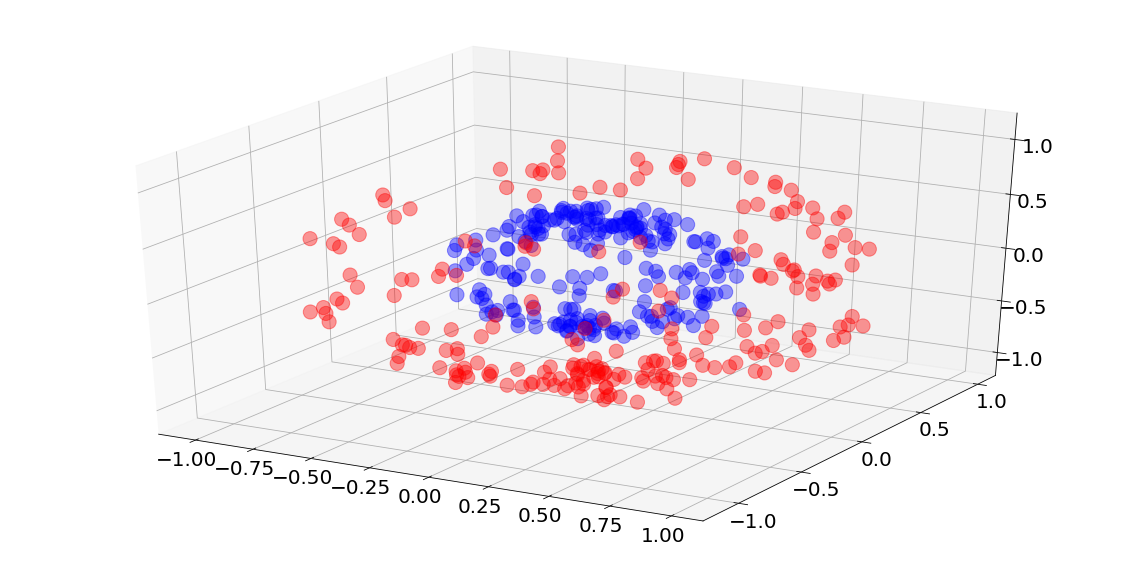

In [3]:
X_3d, y_3d = make_two_3d_circles(n_samples=15, r_out=1, r_in=0.5, noise=0.05)

In [4]:
print(X_3d.shape)
print(y_3d.shape)

(450, 3)
(450,)


In [5]:
#training constants
epochs_num=500
batch_size_num=32
verbose_num=0

In [6]:
model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(3,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2_1 = model.fit(X_3d, y_3d, epochs=epochs_num, 
                        batch_size=batch_size_num, verbose=verbose_num).history
#model_2_1 = model

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(3,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_4_1 = model.fit(X_3d, y_3d, epochs=epochs_num, 
                        batch_size=batch_size_num, verbose=verbose_num).history
#model_4_1 = model

model = models.Sequential()
model.add(layers.Dense(6, activation='relu', input_shape=(3,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_6_1 = model.fit(X_3d, y_3d, epochs=epochs_num, 
                        batch_size=batch_size_num, verbose=verbose_num).history
#model_6_1 = model

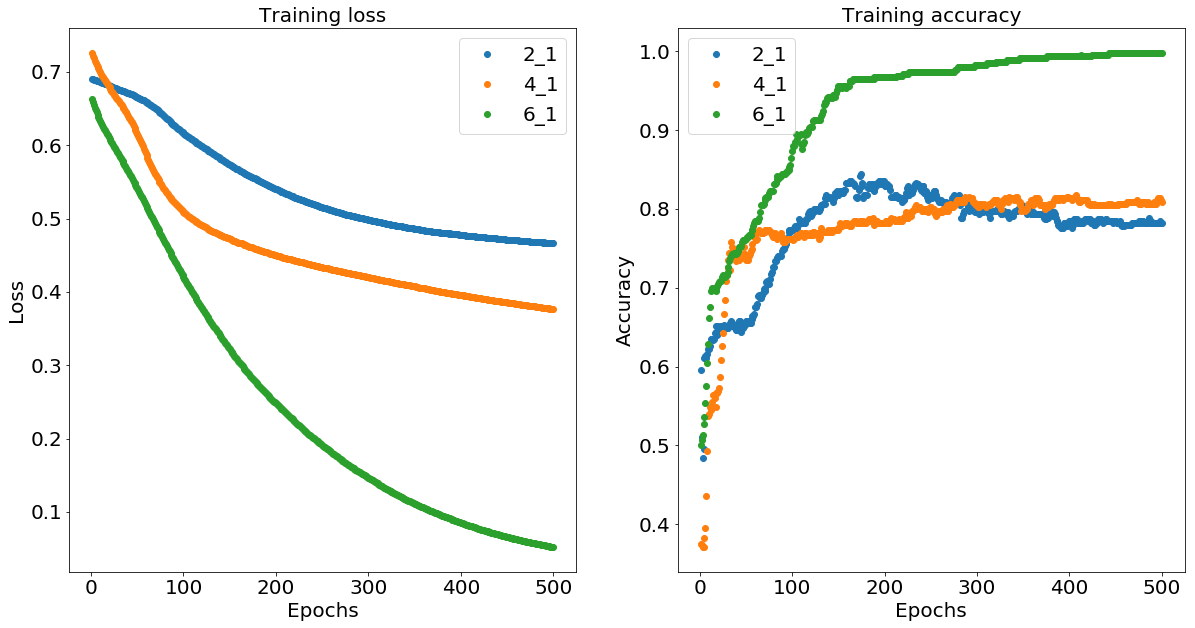

In [7]:
plt.figure(figsize=(20,10))
plot_loss_acc(history_2_1['loss'], history_2_1['acc'],
              ['Training loss','Training accuracy'],['2_1','4_1','6_1'])
plot_loss_acc(history_4_1['loss'], history_4_1['acc'],
              ['Training loss','Training accuracy'],['2_1','4_1','6_1'])
plot_loss_acc(history_6_1['loss'], history_6_1['acc'],
              ['Training loss','Training accuracy'],['2_1','4_1','6_1'])
plt.show()

In [8]:
X_2d = PCA(n_components=2).fit_transform(X_3d)

y_2d = np.hstack([np.zeros(int(len(X_2d)/2), dtype=np.intp),
                  np.ones (int(len(X_2d)/2), dtype=np.intp)])

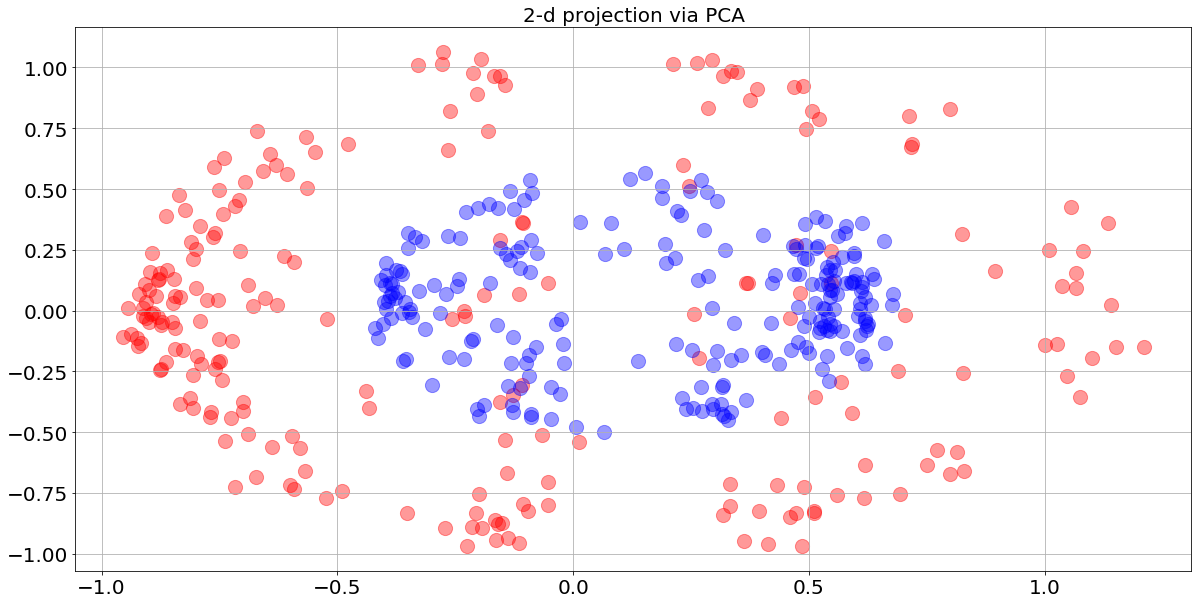

In [9]:
plot_data_2d(X_2d, y_2d,'2-d projection via PCA')

In [10]:
model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(2,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2_1 = model.fit(X_2d, y_2d, epochs=epochs_num, 
                        batch_size=batch_size_num, verbose=verbose_num).history
#model_2_1 = model

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(2,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_4_1 = model.fit(X_2d, y_2d, epochs=epochs_num, 
                        batch_size=batch_size_num, verbose=verbose_num).history
#model_4_1 = model

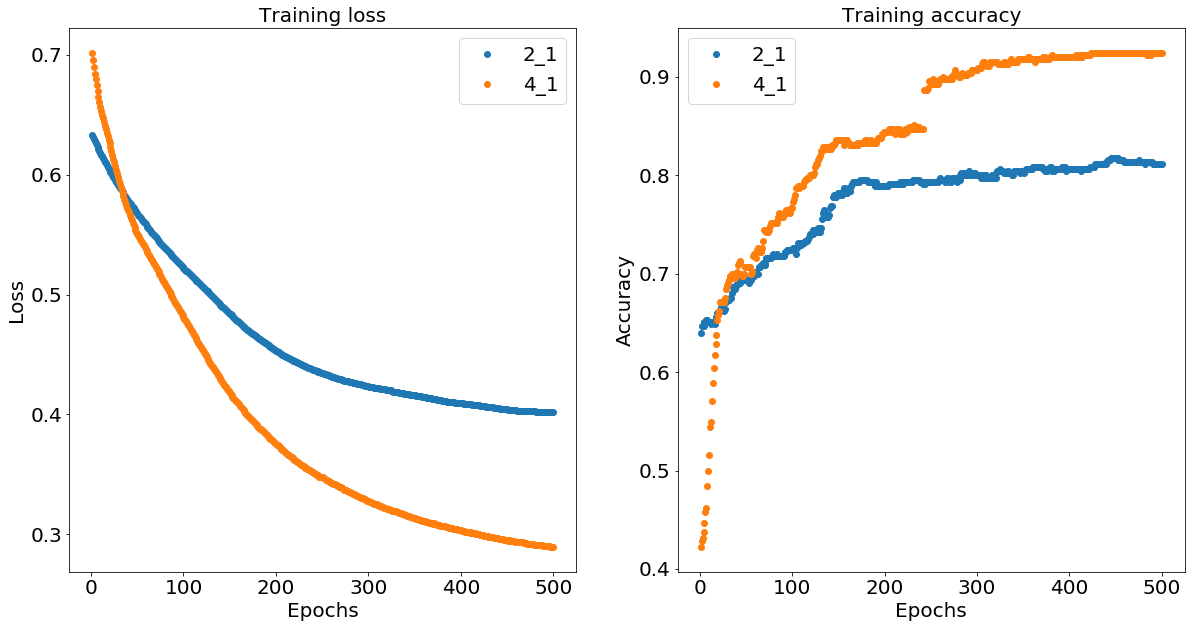

In [11]:
plt.figure(figsize=(20,10))
plot_loss_acc(history_2_1['loss'], history_2_1['acc'],
              ['Training loss','Training accuracy'],['2_1','4_1'])
plot_loss_acc(history_4_1['loss'], history_4_1['acc'],
              ['Training loss','Training accuracy'],['2_1','4_1'])
plt.show()

In [12]:
X_1d = PCA(n_components=1).fit_transform(X_3d)
y_1d = np.hstack([np.zeros(int(len(X_1d)/2), dtype=np.intp),
                  np.ones (int(len(X_1d)/2), dtype=np.intp)])

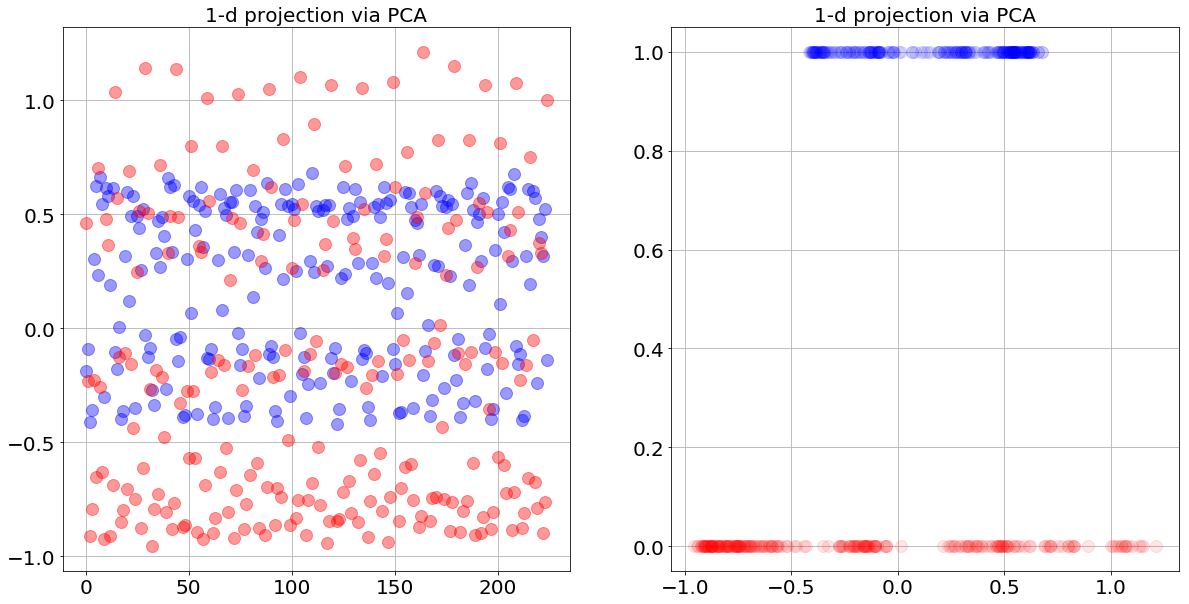

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plot_data_1d(X_1d, y_1d,'1-d projection via PCA')
plt.subplot(122)
plot_data_1d_2nd_look(X_1d, y_1d,'1-d projection via PCA')
plt.show()

In [14]:
epochs_num=800
model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(1,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2_1 = model.fit(X_1d, y_1d, epochs=epochs_num, 
                        batch_size=batch_size_num, verbose=verbose_num).history
#model_2_1 = model

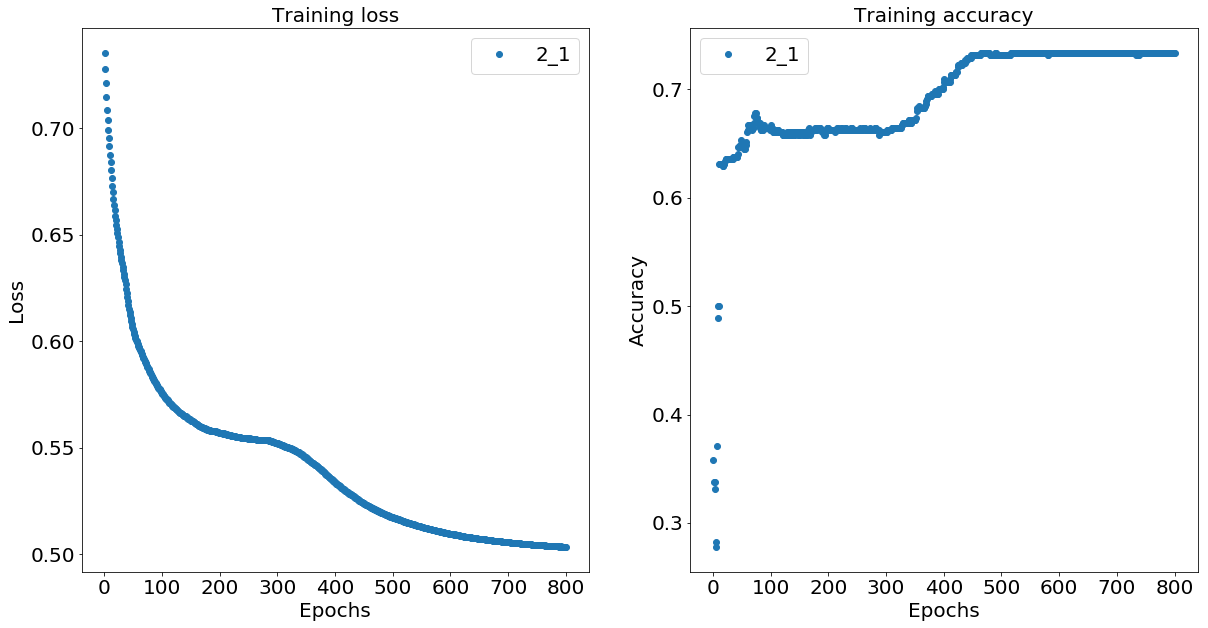

In [15]:
plt.figure(figsize=(20,10))
plot_loss_acc(history_2_1['loss'], history_2_1['acc'],
              ['Training loss','Training accuracy'],['2_1','4_1','6_1'])
plt.show()